# Sapore DiVino

Sapore DiVino è un progetto di Machine Learning che ha l'obiettivo di studiare le caratteristiche dei vini e classificare ciascuno di essi se è di qualita o meno

Inizio con l'importazione delle varie librerie che mi serviranno con l'intero sviluppo del progetto

In [648]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dopodiché leggo il dataset preso da Kaggle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [649]:
dataset = pd.read_csv('winequality-red.csv')

dataset.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1117,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
432,11.9,0.370,0.69,2.3,0.078,12.0,24.0,0.99580,3.00,0.65,12.8,6
980,9.1,0.500,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6
346,6.6,0.815,0.02,2.7,0.072,17.0,34.0,0.99550,3.58,0.89,12.3,7
1259,6.8,0.640,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6
1097,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
1314,7.0,0.360,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6
416,10.6,0.480,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6
512,10.7,0.400,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6
845,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5


Ottengo ulteriori informazioni sul dataset, stampando le righe e le colonne

In [650]:
dataset.shape

(1599, 12)

# Data Understanding

La fase di Data Understanding aiuta a capire la natura del dataset, la sua struttura e le caratteristiche delle variabili presenti.

Vediamo più nel dettaglio la qualità del vino, stampando tutte le categorie presenti nel dataset

In [651]:
dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Notiamo che la moda della qualità è dato dal valore 5

Inizio a semplificarmi il lavoro, contando i vini che hanno qualità <6 e i vini che hanno qualità >=6

In [652]:
print(len(dataset[(dataset['quality'] < 6)]))
print(len(dataset[(dataset['quality'] >= 6)]))

744
855


Notiamo che i vini con una qualità insufficiente sono 744, mentre i vini con una qualità sufficiente sono ben 855. Deduciamo che la maggior parte dei vini nel dataset siano di qualità.

Scelgo di aggiungere una colonna aggiuntiva al dataset, così da capire se un vino è di qualità (qualità >=6) oppure non è di qualità (qualità <6), effettuando una classificazione così che i dati possano essere usati come input per algoritmi di Machine Learning.

In [653]:
dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x >= 6 else 0)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Stampiamo a video le qualità dei vini utilizzando un grafico a torta.

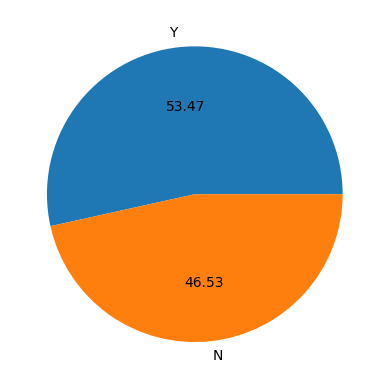

In [654]:
plt.pie(dataset['quality'].value_counts(), labels=['Y', 'N'], autopct="%0.2f")
plt.show()

Anche qui è evidente che la maggior parte dei vini siano di qualità, rendendo però così sbilanciato il dataset ma su questo argomento ci torneremo in seguito.

# Data Cleaning

La fase di Data Cleaning è il processo di identificazione, correzione o rimozione di errori e inconsistenze nei dati al fine di migliorarne la qualità e renderli adatti all'analisi o all'utilizzo in modelli di Machine Learning.

Controlliamo che all'interno del dataset non ci siano intere colonne con un valore nullo.

In [655]:
dataset.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

Controllo se sono presenti valori nulli

In [656]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Non sono presenti valori nulli all'interno del dataset.

Verifico di seguito se esistono duplicati

In [657]:
duplicati_totali = dataset.duplicated().sum()
duplicati_totali

240

Sono presenti ben 240 duplicati, procedo a rimuoverli

In [658]:
dataset = dataset.drop_duplicates()

Controllo che il valore dei duplicati sia uguale a 0

In [659]:
dataset.duplicated().sum()

0

# Feature Scaling

Il Feature Scaling è una tecnica utilizzata nell'ambito del Mschine Learning e delle analisi statistiche per normalizzare o standardizzare le diverse caratteristiche o variabili di un dataset.

In [660]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['free sulfur dioxide', 'total sulfur dioxide']

scaler = MinMaxScaler() 

dataset[features_to_normalize] = scaler.fit_transform(dataset[features_to_normalize])

C:\Users\fsess\AppData\Local\Temp\ipykernel_6096\186831215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[features_to_normalize] = scaler.fit_transform(dataset[features_to_normalize])


Controllo che le modifiche siano state apportate con successo

In [661]:
dataset.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1157,5.1,0.510,0.18,2.1,0.042,0.211268,0.335689,0.99240,3.46,0.87,12.9,1
1363,8.0,0.830,0.27,2.0,0.080,0.140845,0.201413,0.99652,3.29,0.48,9.8,0
894,7.2,0.630,0.03,2.2,0.080,0.225352,0.289753,0.99745,3.53,0.58,9.8,1
369,9.4,0.270,0.53,2.4,0.074,0.070423,0.042403,0.99620,3.20,1.13,12.0,1
1035,10.1,0.370,0.34,2.4,0.085,0.056338,0.038869,0.99683,3.17,0.65,10.6,1
247,8.2,0.600,0.17,2.3,0.072,0.140845,0.236749,0.99630,3.20,0.45,9.3,0
810,7.3,0.490,0.10,2.6,0.068,0.042254,0.028269,0.99562,3.30,0.47,10.5,0
1594,6.2,0.600,0.08,2.0,0.090,0.436620,0.134276,0.99490,3.45,0.58,10.5,0
859,6.8,0.560,0.22,1.8,0.074,0.197183,0.063604,0.99438,3.40,0.82,11.2,1
1141,8.2,0.380,0.32,2.5,0.080,0.323944,0.229682,0.99624,3.27,0.85,11.0,1


# Feature Selection

La Feature Selection è il processo di scegliere un sottoinsieme rilevante di variabili (feature o caratteristiche) da utilizzare per costruire un modello o analizzare dati.

Vado a stamparmi quella che è la matrice delle correlazioni così da avere una panoramica generale delle correlazioni sulle caratteristiche del dataset.

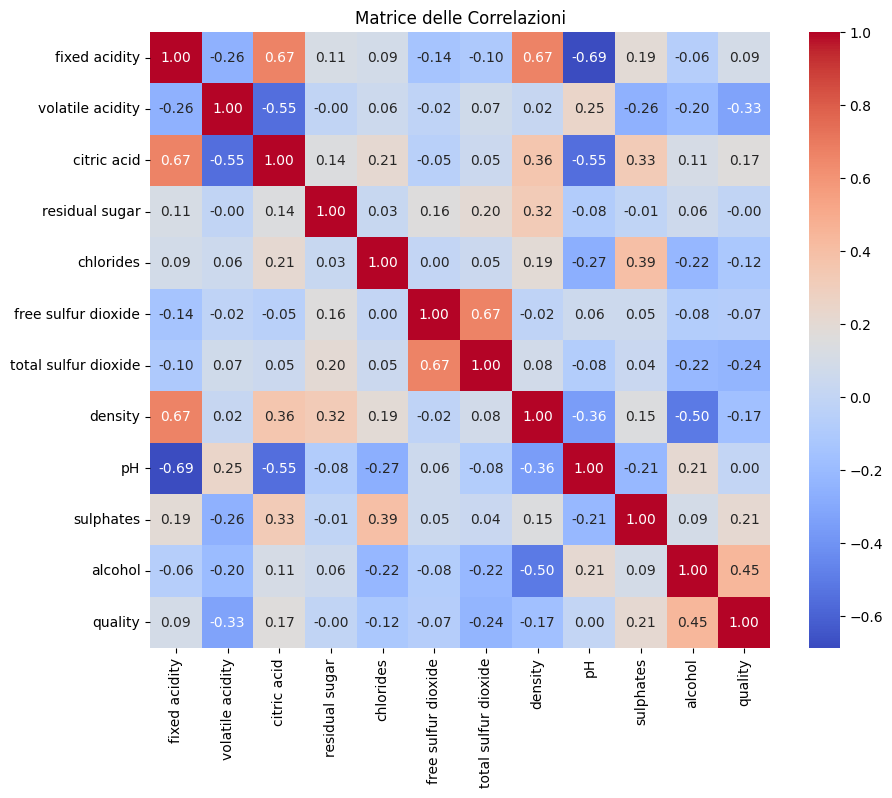

In [662]:
# Calcola la matrice delle correlazioni
correlation_matrix = dataset.corr()

# Visualizza la matrice delle correlazioni come una heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice delle Correlazioni")
plt.show()

In generale, notiamo che tra le caratteristiche del problema non ci sono forti correlazioni. Ma possiamo notare anche che:
    
    - *citric acid* e *fixed acidity* sono ben correlate
    - *density* e *fixed acidity* sono ben correlate
    - *total sulfur dioxide* e *free sulfur dioxide* sono ben correlate

# Data Balancing


Il Data Balancing è una pratica utilizzata nell'ambito dell'apprendimento automatico e dell'analisi dei dati per affrontare il problema delle classi sbilanciate.

Come detto in precedenza, abbiamo un numero di classi maggiore di vini con qualità almeno sufficiente rispetto a quelli che sono insufficienti; quindi il nostro dataset è sbilanciato, come mostra il grafico di seguito

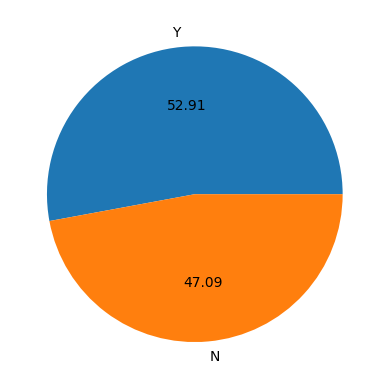

In [663]:
plt.pie(dataset['quality'].value_counts(), labels=['Y', 'N'], autopct="%0.2f")
plt.show()

Per poter affrontare al meglio il problema Data Balancing, mi rimangono due opzioni:

    -  Undersampling, ovvero ridurre il numero di campioni della classe maggioritaria fino a raggiungere un equilibrio con le classi minoritarie.
    -  Oversampling, ovvero aumentare il numero di campioni della classe minoritaria fino a raggiungere un equilibrio con le classi maggioritarie.

Tra le due, ho scelto di utilizzare la tecnica dell'undersampling

In [664]:
target = 'quality'
X = dataset.iloc[: , dataset.columns!=target]
Y = dataset.iloc[: , dataset.columns==target]

from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Data Model

In [665]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,matthews_corrcoef,f1_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
cmplnb = ComplementNB()


Scriviamo il codice riguardante il Gaussian Naive Bayes

In [666]:
gnb.fit(X_train,Y_train.values.ravel()) #training 
y_pred = gnb.predict(X_test) #testing


Stampo quelli che sono i valori dell'accuracy, precision e recall

In [667]:
accuracyGNB = accuracy_score(Y_test,y_pred)
precisionGNB = precision_score(Y_test,y_pred)
recallGNB = recall_score(Y_test,y_pred)
mccGNB = matthews_corrcoef(Y_test, y_pred)
f1_scoreGNB = f1_score(Y_test, y_pred)

print('Accuracy: ' , accuracyGNB)
print('Precision: ' , precisionGNB)
print('Recall: ' , recallGNB)
print('F1 score: ', f1_scoreGNB)
print('MCC: ', mccGNB)


Accuracy:  0.75
Precision:  0.7735849056603774
Recall:  0.7522935779816514
F1 score:  0.7627906976744188
MCC:  0.4988677189989742


Introduciamo la matrice di confusione

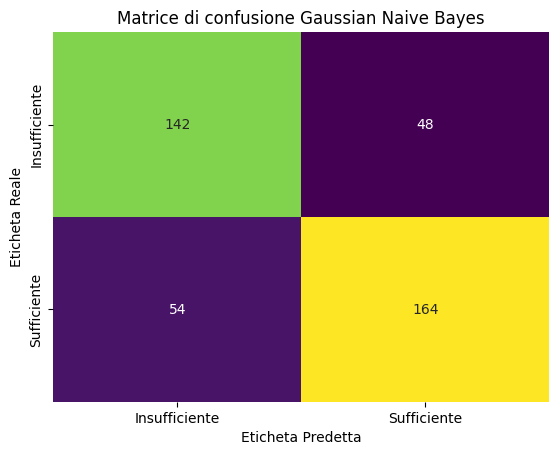

In [668]:
labels=['Insufficiente', 'Sufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Gaussian Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

Procediamo con Multinomial Naive Bayes

Accuracy:  0.6348039215686274
Precision:  0.6055045871559633
Recall:  0.908256880733945
F1 score:  0.7266055045871559
MCC:  0.286754823698056


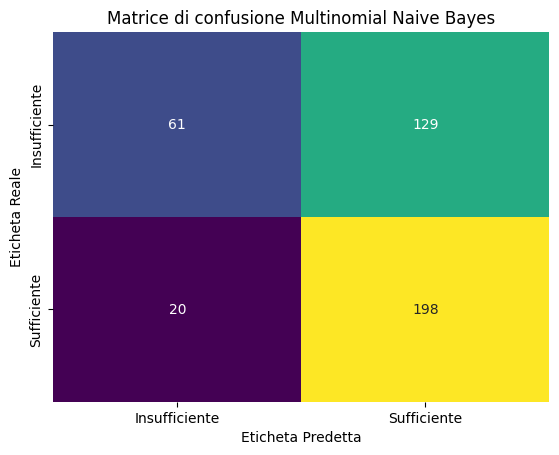

In [669]:
mnb.fit(X_train,Y_train.values.ravel()) #training 
y_pred_2 = mnb.predict(X_test) #testing

accuracyMNB = accuracy_score(Y_test,y_pred_2)
precisionMNB = precision_score(Y_test,y_pred_2)
recallMNB = recall_score(Y_test,y_pred_2)
mccMNB = matthews_corrcoef(Y_test, y_pred_2)
f1_scoreMNB = f1_score(Y_test, y_pred_2)
print('Accuracy: ' , accuracyMNB)
print('Precision: ' , precisionMNB)
print('Recall: ' , recallMNB)
print('F1 score: ', f1_scoreMNB)
print('MCC: ', mccMNB)


labels=['Insufficiente', 'Sufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred_2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Multinomial Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

Procediamo con Bernoulli Naive Bayes

Accuracy:  0.5416666666666666
Precision:  0.5417789757412399
Recall:  0.9220183486238532
F1 score:  0.6825127334465196
MCC:  0.04738987676760273


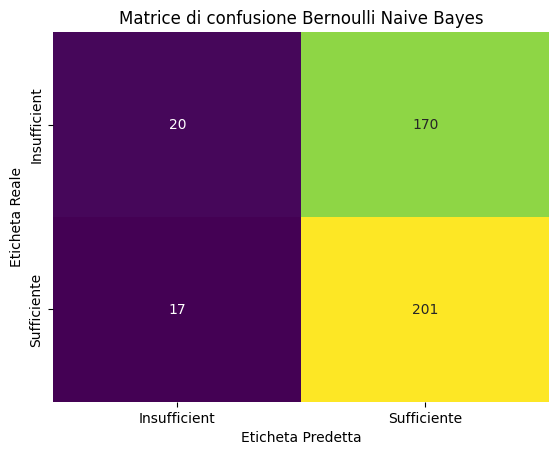

In [670]:
bnb.fit(X_train,Y_train.values.ravel()) #training 
y_pred_3 = bnb.predict(X_test) #testing

accuracyBNB = accuracy_score(Y_test,y_pred_3)
precisionBNB = precision_score(Y_test,y_pred_3)
recallBNB = recall_score(Y_test,y_pred_3)
mccBNB = matthews_corrcoef(Y_test, y_pred_3)
f1_scoreBNB = f1_score(Y_test, y_pred_3)
print('Accuracy: ' , accuracyBNB)
print('Precision: ' , precisionBNB)
print('Recall: ' , recallBNB)
print('F1 score: ', f1_scoreBNB)
print('MCC: ', mccBNB)


labels=['Insufficient', 'Sufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred_3)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Bernoulli Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

Procediamo con Complement Naive Bayes

Accuracy:  0.6642156862745098
Precision:  0.6832579185520362
Recall:  0.6926605504587156
F1 score:  0.6879271070615034
MCC:  0.3246041181477607


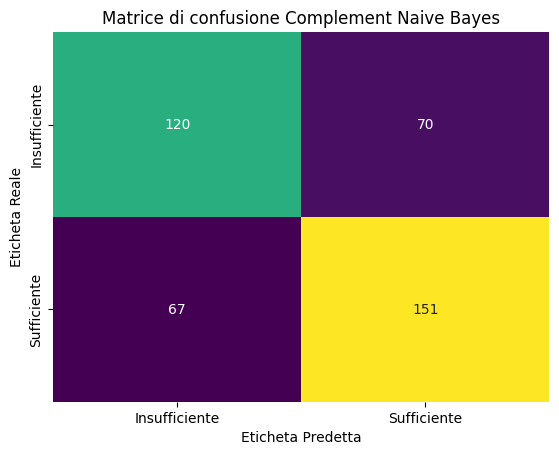

In [671]:
cmplnb.fit(X_train,Y_train.values.ravel()) #training 
y_pred_4 = cmplnb.predict(X_test) #testing

accuracyCNB = accuracy_score(Y_test,y_pred_4)
precisionCNB = precision_score(Y_test,y_pred_4)
recallCNB = recall_score(Y_test,y_pred_4)
mccCNB = matthews_corrcoef(Y_test, y_pred_4)
f1_scoreCNB = f1_score(Y_test, y_pred_4)
print('Accuracy: ' , accuracyCNB)
print('Precision: ' , precisionCNB)
print('Recall: ' , recallCNB)
print('F1 score: ', f1_scoreCNB)
print('MCC: ', mccCNB)

labels=['Insufficiente', 'Sufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred_4)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Complement Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

# Decision Tree

I Decision Tree, o alberi decisionali, sono un tipo di modello di Machine Learning utilizzato per compiere decisioni basate su una serie di regole decisionali. Questi algoritmi sono ampiamente utilizzati sia per problemi di classificazione, come in questo caso

Accuracy:  0.7132352941176471
Precision:  0.730593607305936
Recall:  0.7339449541284404
F1 score:  0.7322654462242563
MCC:  0.42356694341090045


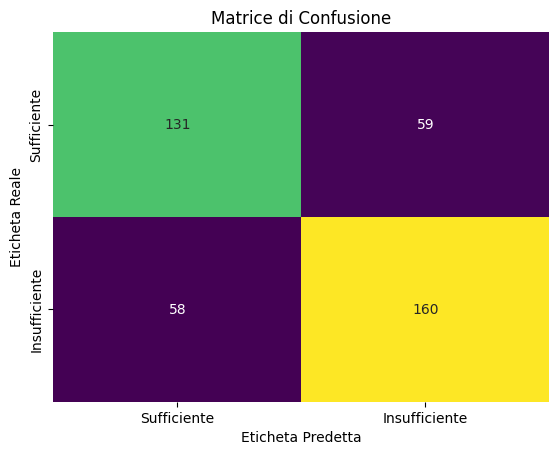

In [672]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 4)

dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
accuracyDTC = accuracy_score(Y_test,y_pred)
precisionDTC = precision_score(Y_test,y_pred)
recallDTC = recall_score(Y_test,y_pred)
mccDTC = matthews_corrcoef(Y_test, y_pred)
f1_scoreDTC = f1_score(Y_test, y_pred)

print('Accuracy: ' , accuracyDTC)
print('Precision: ' , precisionDTC)
print('Recall: ' , recallDTC)
print('F1 score: ', f1_scoreDTC)
print('MCC: ', mccDTC)

labels = ['Sufficiente', 'Insufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()